In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def standardize_column_names(df, is_analysis_df=False):
    """
    Standardize column names between datasets
    """
    if is_analysis_df:
        mapping = {
            'age': 'Age',
            'sex': 'Sex',
            'cp': 'ChestPainType',
            'trtbps': 'RestingBP',
            'chol': 'Cholesterol',
            'fbs': 'FastingBS',
            'restecg': 'RestingECG',
            'thalachh': 'MaxHR',
            'exng': 'ExerciseAngina',
            'oldpeak': 'Oldpeak',
            'slp': 'ST_Slope',
            'output': 'HeartDisease'
        }
        df = df.rename(columns=mapping)
    return df

In [3]:
def load_and_preprocess_data():
    """
    Load and preprocess all datasets with standardized column names
    """
    # Load datasets
    heart_df = pd.read_csv('heart.csv')
    analysis_df = pd.read_csv('heart_analysis.csv')
    o2_df = pd.read_csv('o2Saturation.csv', header=None, names=['O2Saturation'])

    # Standardize column names
    analysis_df = standardize_column_names(analysis_df, is_analysis_df=True)

    # Print initial information
    print("Initial dataset shapes:")
    print(f"Heart dataset: {heart_df.shape}")
    print(f"Heart analysis dataset: {analysis_df.shape}")
    print(f"O2 Saturation dataset: {o2_df.shape}")

    # Print column names for verification
    print("\nHeart dataset columns:", heart_df.columns.tolist())
    print("\nHeart analysis dataset columns:", analysis_df.columns.tolist())

    # Check value distributions in target variables
    print("\nHeart Disease distribution in heart dataset:")
    print(heart_df['HeartDisease'].value_counts(normalize=True))
    print("\nHeart Disease distribution in analysis dataset:")
    print(analysis_df['HeartDisease'].value_counts(normalize=True))

    return heart_df, analysis_df, o2_df


In [4]:
def merge_datasets(heart_df, analysis_df, o2_df):
    """
    Merge datasets with proper column alignment
    """
    # Identify common columns between heart datasets
    common_columns = list(set(heart_df.columns) & set(analysis_df.columns))
    print("\nCommon columns:", common_columns)

    # Combine heart disease datasets
    combined_df = pd.concat([heart_df[common_columns], analysis_df[common_columns]],
                          axis=0, ignore_index=True)

    # Add O2 Saturation data
    if len(o2_df) >= len(combined_df):
        combined_df['O2Saturation'] = o2_df['O2Saturation'].values[:len(combined_df)]

    print("\nFinal combined dataset shape:", combined_df.shape)
    return combined_df


In [5]:
def analyze_data_quality(df):
    """
    Analyze data quality of combined dataset
    """
    print("\nMissing values:")
    print(df.isnull().sum())

    print("\nBasic statistics:")
    print(df.describe())

    # Analyze categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f"\nDistribution of {col}:")
        print(df[col].value_counts(normalize=True))


In [6]:
def check_outliers(df, feature):
    """
    Check for outliers using IQR method
    """
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    return len(outliers), lower_bound, upper_bound

In [7]:
def analyze_outliers(df):
    """
    Analyze outliers in numerical features
    """
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nOutlier Analysis:")
    outlier_info = {}
    for feature in numerical_features:
        if feature != 'HeartDisease':
            outlier_count, lower_bound, upper_bound = check_outliers(df, feature)
            print(f"\n{feature}:")
            print(f"Number of outliers: {outlier_count}")
            print(f"Lower bound: {lower_bound:.2f}")
            print(f"Upper bound: {upper_bound:.2f}")
            outlier_info[feature] = {'count': outlier_count, 'lower': lower_bound, 'upper': upper_bound}

    return outlier_info


In [8]:
def plot_distributions(df):
    """
    Plot distributions of numerical features
    """
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_features = [col for col in numerical_features if col != 'HeartDisease']

    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data=df, x=feature, hue='HeartDisease', multiple="stack")
        plt.title(f'{feature} Distribution by Heart Disease')
    plt.tight_layout()
    plt.show()

Initial dataset shapes:
Heart dataset: (918, 12)
Heart analysis dataset: (303, 14)
O2 Saturation dataset: (3586, 1)

Heart dataset columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Heart analysis dataset columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'caa', 'thall', 'HeartDisease']

Heart Disease distribution in heart dataset:
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

Heart Disease distribution in analysis dataset:
HeartDisease
1    0.544554
0    0.455446
Name: proportion, dtype: float64

Common columns: ['MaxHR', 'HeartDisease', 'Cholesterol', 'ExerciseAngina', 'Age', 'Sex', 'FastingBS', 'ST_Slope', 'ChestPainType', 'RestingBP', 'Oldpeak', 'RestingECG']

Final combined dataset shape: (1221, 13)

Missing values:
MaxHR             0
HeartDisease 

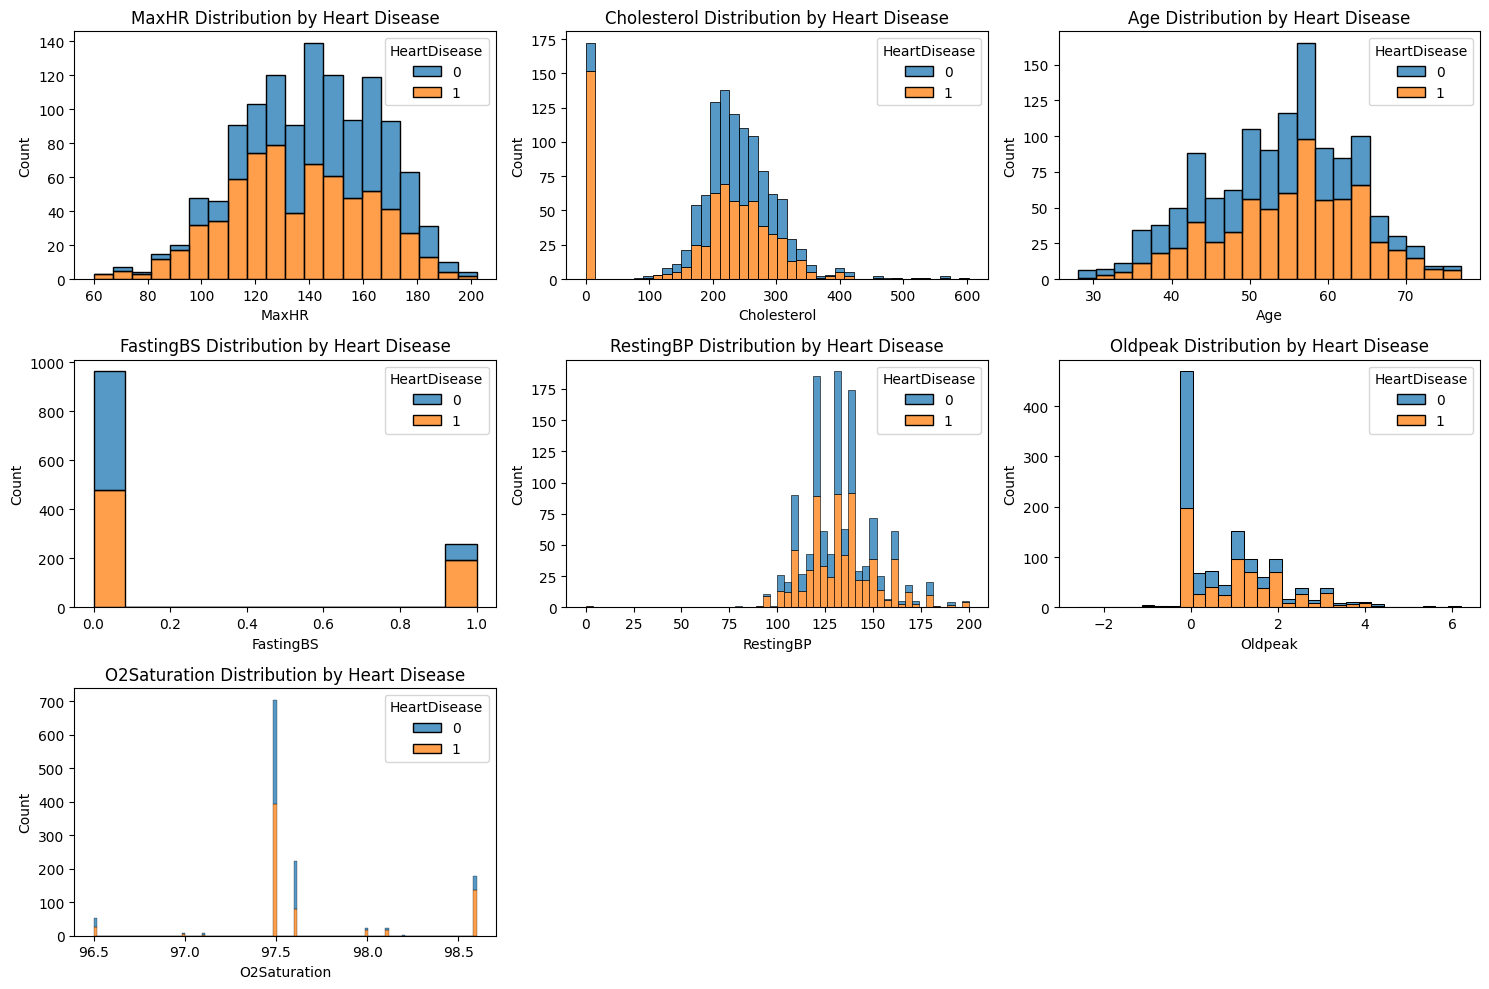


Preprocessed dataset saved as 'preprocessed_heart_data.csv'


In [10]:
# Execute the analysis
if __name__ == "__main__":
    # Load and preprocess data
    heart_df, analysis_df, o2_df = load_and_preprocess_data()

    # Merge datasets
    combined_df = merge_datasets(heart_df, analysis_df, o2_df)

    # Analyze data quality
    analyze_data_quality(combined_df)

    # Analyze outliers
    outlier_info = analyze_outliers(combined_df)

    # Plot distributions
    plot_distributions(combined_df)

    # Save preprocessed dataset
    combined_df.to_csv('preprocessed_heart_data.csv', index=False)
    print("\nPreprocessed dataset saved as 'preprocessed_heart_data.csv'")

# **Handling Outliers**

In [11]:
def handle_categorical_features(df):
    """
    Standardize and encode categorical features
    """
    # Standardize binary features
    df['Sex'] = df['Sex'].map({'M': 1, 'F': 0, '1': 1, '0': 0})
    df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0, '1': 1, '0': 0})

    # Encode multi-category features
    le = LabelEncoder()
    df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
    df['RestingECG'] = le.fit_transform(df['RestingECG'])
    df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

    return df

In [12]:
def handle_outliers_with_imputation(df):
    """
    Handle outliers using imputation strategies
    """
    # Copy dataframe
    data = df.copy()

    # RestingBP outliers (37)
    # Medical context: Replace extreme values with boundaries
    resting_bp_median = data['RestingBP'].median()
    data.loc[data['RestingBP'] < 90, 'RestingBP'] = resting_bp_median
    data.loc[data['RestingBP'] > 170, 'RestingBP'] = 170

    # Cholesterol outliers (194)
    # Replace zeros with median and cap high values
    cholesterol_median = data.loc[data['Cholesterol'] > 0, 'Cholesterol'].median()
    data.loc[data['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_median
    data.loc[data['Cholesterol'] > 390.5, 'Cholesterol'] = 390.5

    # Oldpeak outliers (12)
    # Cap at boundaries
    data.loc[data['Oldpeak'] < -2.4, 'Oldpeak'] = -2.4
    data.loc[data['Oldpeak'] > 4.0, 'Oldpeak'] = 4.0

    # MaxHR outliers (2)
    # Use age-based theoretical maximum
    theoretical_max_hr = 220 - data['Age']
    data.loc[data['MaxHR'] > theoretical_max_hr, 'MaxHR'] = theoretical_max_hr

    # O2Saturation outliers (295)
    # Medical context: Use mean imputation for extreme values
    o2_mean = data['O2Saturation'].mean()
    data.loc[data['O2Saturation'] < 97.35, 'O2Saturation'] = o2_mean
    data.loc[data['O2Saturation'] > 97.75, 'O2Saturation'] = o2_mean

    return data

In [13]:
def create_interaction_features(df):
    """
    Create interaction features based on medical knowledge
    """
    data = df.copy()

    # Age and MaxHR interaction
    data['Age_MaxHR'] = data['Age'] * data['MaxHR']

    # RestingBP and O2Saturation
    data['BP_O2'] = data['RestingBP'] * data['O2Saturation']

    # Oldpeak and O2Saturation
    data['Oldpeak_O2'] = data['Oldpeak'] * data['O2Saturation']

    # Age groups
    data['AgeGroup'] = pd.cut(data['Age'],
                             bins=[0, 40, 50, 60, 100],
                             labels=['Young', 'Middle', 'Senior', 'Elderly'])

    return data

In [14]:
def scale_numerical_features(df):
    """
    Scale numerical features
    """
    scaler = StandardScaler()
    numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',
                     'O2Saturation', 'Age_MaxHR', 'BP_O2', 'Oldpeak_O2']

    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

In [15]:
def analyze_processed_data(df_original, df_processed):
    """
    Analyze the changes after processing
    """
    print("Original Data Statistics:")
    print(df_original.describe())
    print("\nProcessed Data Statistics:")
    print(df_processed.describe())

    # Plot distributions before and after
    numerical_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'O2Saturation']

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(2, 3, i)
        sns.kdeplot(data=df_original[col], label='Before')
        sns.kdeplot(data=df_processed[col], label='After')
        plt.title(f'{col} Distribution')
        plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
def process_data(input_file='preprocessed_heart_data.csv'):
    """
    Main processing function
    """
    # Load data
    df = pd.read_csv(input_file)

    # Store original for comparison
    df_original = df.copy()

    # Process steps
    print("Processing data...")
    df = handle_categorical_features(df)
    df = handle_outliers_with_imputation(df)
    df = create_interaction_features(df)
    df = scale_numerical_features(df)

    # Analyze changes
    analyze_processed_data(df_original, df)

    # Save processed data
    df.to_csv('processed_heart_data.csv', index=False)
    print("\nProcessed data saved as 'processed_heart_data.csv'")

    return df


Processing data...
Original Data Statistics:
             MaxHR  HeartDisease  Cholesterol          Age    FastingBS  \
count  1221.000000   1221.000000  1221.000000  1221.000000  1221.000000   
mean    139.995086      0.551188   210.578215    53.723178     0.212121   
std      25.453461      0.497577   100.394018     9.350481     0.408978   
min      60.000000      0.000000     0.000000    28.000000     0.000000   
25%     122.000000      0.000000   188.000000    47.000000     0.000000   
50%     141.000000      1.000000   228.000000    54.000000     0.000000   
75%     160.000000      1.000000   269.000000    60.000000     0.000000   
max     202.000000      1.000000   603.000000    77.000000     1.000000   

        RestingBP      Oldpeak  O2Saturation  
count  1221.00000  1221.000000   1221.000000  
mean    132.20475     0.925143     97.650532  
std      18.27277     1.092282      0.461956  
min       0.00000    -2.600000     96.500000  
25%     120.00000     0.000000     97.500000

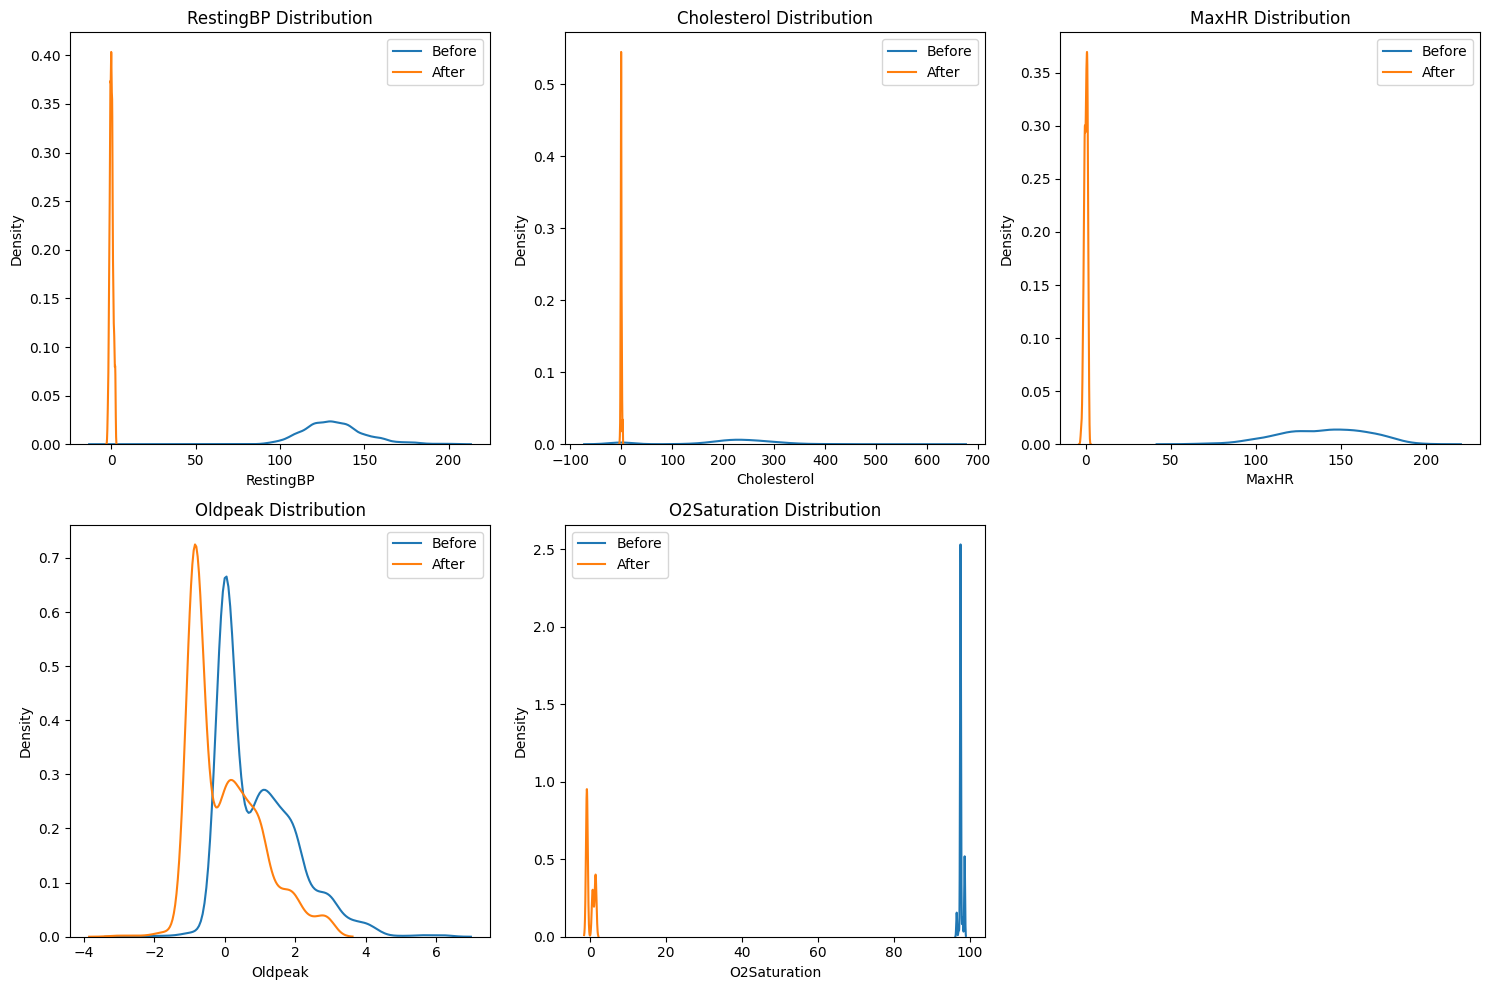


Processed data saved as 'processed_heart_data.csv'


In [17]:
if __name__ == "__main__":
    processed_df = process_data()

# **Modeling**

In [18]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [20]:
import warnings
import logging
import os

# Suppress all warnings
warnings.filterwarnings('ignore')

# Suppress LightGBM output
logger = logging.getLogger('lightgbm')
logger.setLevel(logging.ERROR)

# Suppress XGBoost output
logger = logging.getLogger('xgboost')
logger.setLevel(logging.ERROR)


In [21]:
def prepare_data():
    """
    Load and prepare the processed data for modeling
    """
    # Load processed data
    df = pd.read_csv('processed_heart_data.csv')

    # Separate features and target
    X = df.drop(['HeartDisease', 'AgeGroup'], axis=1)
    y = df['HeartDisease']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    return X_train, X_test, y_train, y_test, X.columns


In [22]:
def train_random_forest(X_train, y_train):
    """
    Train and tune Random Forest model
    """
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1,
        verbose=0
    )
    rf_model.fit(X_train, y_train)
    return rf_model

In [23]:
def train_xgboost(X_train, y_train):
    """
    Train and tune XGBoost model
    """
    xgb_model = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=0,
        silent=True
    )
    xgb_model.fit(X_train, y_train)
    return xgb_model


In [24]:
def train_lightgbm(X_train, y_train):
    """
    Train and tune LightGBM model
    """
    lgb_model = lgb.LGBMClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbose=-1,
        silent=True
    )
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        lgb_model.fit(X_train, y_train)#, verbose=-1)
    return lgb_model




In [25]:
def train_catboost(X_train, y_train):
    """
    Train and tune CatBoost model
    """
    cat_model = CatBoostClassifier(
        iterations=200,
        depth=6,
        learning_rate=0.1,
        l2_leaf_reg=3,
        random_state=42,
        #verbose=False,
        logging_level='Silent'
    )
    cat_model.fit(X_train, y_train, verbose=False)
    return cat_model

In [26]:
def create_ensemble(models):
    """
    Create voting ensemble from trained models
    """
    ensemble = VotingClassifier(
        estimators=[
            ('rf', models['random_forest']),
            ('xgb', models['xgboost']),
            ('lgb', models['lightgbm']),
            ('cat', models['catboost'])
        ],
        voting='soft',
        verbose=False
    )
    return ensemble

In [27]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate model performance
    """
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    return metrics

In [28]:
def cross_validate_models(models, X, y):
    """
    Perform cross-validation for all models
    """
    cv_results = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        cv_results[name] = {
            'Mean CV Score': scores.mean(),
            'Std CV Score': scores.std()
        }

    return cv_results


In [29]:
def analyze_feature_importance(models, feature_names):
    """
    Analyze feature importance from all models
    """
    importance_df = pd.DataFrame()

    # Get feature importance from each model
    for name, model in models.items():
        if hasattr(model, 'feature_importances_'):
            importance_df[name] = model.feature_importances_

    importance_df.index = feature_names
    return importance_df.mean(axis=1).sort_values(ascending=False)


In [30]:
def main():
    # Suppress output
    os.environ['PYTHONWARNINGS'] = 'ignore'

    # Prepare data
    print("Loading and preparing data...", end=' ')
    X_train, X_test, y_train, y_test, feature_names = prepare_data()
    print("Done")

    # Train models
    print("Training models...", end=' ')
    models = {
        'random_forest': train_random_forest(X_train, y_train),
        'xgboost': train_xgboost(X_train, y_train),
        'lightgbm': train_lightgbm(X_train, y_train),
        'catboost': train_catboost(X_train, y_train)
    }
    print("Done")

    # Create and train ensemble
    print("Creating ensemble...", end=' ')
    ensemble = create_ensemble(models)
    ensemble.fit(X_train, y_train)
    models['ensemble'] = ensemble
    print("Done")

    # Evaluate models
    print("\nEvaluating models:")
    results = []
    for name, model in models.items():
        metrics = evaluate_model(model, X_test, y_test, name)
        results.append(metrics)

    # Create results DataFrame
    results_df = pd.DataFrame(results).set_index('Model')
    print("\nModel Performance:")
    print(results_df.round(4))

    # Cross-validation results
    print("\nCross-Validation Results:")
    cv_results = cross_validate_models(models, X_train, y_train)
    for model, scores in cv_results.items():
        print(f"{model:<12}: {scores['Mean CV Score']:.4f} (+/- {scores['Std CV Score']*2:.4f})")

    # Feature importance
    print("\nTop 10 Most Important Features:")
    importance = analyze_feature_importance(models, feature_names)
    print(importance.head(10).round(4))

    # Save results
    results_df.round(4).to_csv('model_results.csv')
    importance.to_frame('Importance').round(4).to_csv('feature_importance.csv')

    return models, results_df, importance

In [31]:
if __name__ == "__main__":
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        models, results, importance = main()

Loading and preparing data... Done
Training models... Done
Creating ensemble... Done

Evaluating models:

Model Performance:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                        
random_forest    0.8367     0.8146  0.9111    0.8601   0.9245
xgboost          0.8367     0.8467  0.8593    0.8529   0.9083
lightgbm         0.8327     0.8456  0.8519    0.8487   0.9124
catboost         0.8571     0.8425  0.9111    0.8754   0.9308
ensemble         0.8449     0.8440  0.8815    0.8623   0.9238

Cross-Validation Results:
random_forest: 0.8525 (+/- 0.0410)
xgboost     : 0.8320 (+/- 0.0464)
lightgbm    : 0.8176 (+/- 0.0398)
catboost    : 0.8525 (+/- 0.0233)
ensemble    : 0.8381 (+/- 0.0421)

Top 10 Most Important Features:
Age_MaxHR        136.7646
Cholesterol      133.1978
MaxHR            123.4009
Age               93.4630
BP_O2             91.1344
ChestPainType     68.8705
Oldpeak           63.2302
ST_Slope          58.7642
Re

# **Advanced Model Analysis with GridSearch, Visualization and SHAP**

In [32]:
from sklearn.model_selection import GridSearchCV
import shap
import joblib
from sklearn.metrics import confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [33]:
def perform_grid_search():
    """
    Perform grid search for all models
    """
    # Load data
    X_train, X_test, y_train, y_test, feature_names = prepare_data()

    # Grid search parameters
    param_grids = {
        'random_forest': {
            'estimator': RandomForestClassifier(random_state=42),
            'param_grid': {
                'n_estimators': [100, 200, 300],
                'max_depth': [6, 8, 10],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
        },
        'xgboost': {
            'estimator': xgb.XGBClassifier(random_state=42, verbosity=0),
            'param_grid': {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 4, 6],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0]
            }
        },
        'lightgbm': {
            'estimator': lgb.LGBMClassifier(random_state=42, verbose=-1),
            'param_grid': {
                'n_estimators': [100, 200],
                'max_depth': [4, 6],
                'num_leaves': [31, 63],
                'learning_rate': [0.01, 0.1]
            }
        },
        'catboost': {
            'estimator': CatBoostClassifier(random_state=42, verbose=False),
            'param_grid': {
                'iterations': [100, 200],
                'depth': [4, 6],
                'learning_rate': [0.01, 0.1],
                'l2_leaf_reg': [1, 3]
            }
        }
    }

    best_models = {}
    grid_search_results = {}

    print("Performing Grid Search...")
    for name, config in param_grids.items():
        print(f"\nTuning {name}...", end=' ')
        grid_search = GridSearchCV(
            estimator=config['estimator'],
            param_grid=config['param_grid'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        grid_search_results[name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }
        print("Done")

    return best_models, grid_search_results, X_train, X_test, y_train, y_test


In [34]:
def visualize_results(results_df, grid_search_results, best_models, X_test, y_test):
    """
    Create and display visualizations with improved readability
    """
    plt.style.use('seaborn-v0_8')

    # 1. Model Performance Comparison - Improved
    plt.figure(figsize=(15, 8))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

    # Create positions for grouped bars
    models = results_df.index
    x = np.arange(len(models))
    width = 0.15  # Width of bars

    # Plot each metric as a group
    for i, metric in enumerate(metrics):
        offset = width * (i - len(metrics)/2 + 0.5)
        bars = plt.bar(x + offset, results_df[metric], width, label=metric)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height,
                    f'{height:.3f}', ha='center', va='bottom',
                    rotation=45, fontsize=8)

    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.xticks(x, models, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('model_performance.png', bbox_inches='tight', dpi=300)
    plt.show()

    # 2. Grid Search Results
    plt.figure(figsize=(10, 6))
    model_names = list(grid_search_results.keys())
    cv_scores = [results['best_score'] for results in grid_search_results.values()]

    colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']
    bars = plt.bar(model_names, cv_scores, color=colors)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.4f}', ha='center', va='bottom')

    plt.title('Best Cross-validation Scores')
    plt.xlabel('Models')
    plt.ylabel('CV Score')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('cv_results.png', bbox_inches='tight', dpi=300)
    plt.show()

    # 3. ROC Curves with different line styles
    plt.figure(figsize=(10, 6))
    line_styles = ['-', '--', '-.', ':']
    colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']

    for (name, model), ls, color in zip(best_models.items(), line_styles, colors):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})',
                linestyle=ls, color=color, linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', label='Random', alpha=0.5, linewidth=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('roc_curves.png', bbox_inches='tight', dpi=300)
    plt.show()

In [35]:
def explain_with_shap(best_models, X_train, X_test):
    """
    Generate and display SHAP explanations with fixed size handling
    """
    print("\nGenerating SHAP explanations...")

    shap_values = {}
    feature_names = X_test.columns  # Get feature names

    for name, model in best_models.items():
        if name in ['random_forest', 'xgboost']:
            print(f"\nAnalyzing {name}...", end=' ')
            try:
                # Create explainer
                explainer = shap.TreeExplainer(model)

                # Get SHAP values
                if name == 'random_forest':
                    shap_values[name] = explainer.shap_values(X_test)[1]  # For binary classification
                else:
                    shap_values[name] = explainer.shap_values(X_test)

                # Summary plot
                plt.figure(figsize=(12, 8))
                if name == 'random_forest':
                    shap.summary_plot(
                        shap_values[name],
                        X_test,
                        feature_names=feature_names,
                        show=False
                    )
                else:
                    shap.summary_plot(
                        shap_values[name],
                        X_test,
                        feature_names=feature_names,
                        show=False
                    )
                plt.title(f'SHAP Summary Plot - {name}')
                plt.tight_layout()
                plt.savefig(f'shap_summary_{name}.png', bbox_inches='tight', dpi=300)
                plt.show()

                # Feature importance plot (alternative to interaction plot)
                plt.figure(figsize=(12, 8))
                feature_importance = np.abs(shap_values[name]).mean(0)
                feature_importance = pd.DataFrame(
                    feature_importance,
                    index=feature_names,
                    columns=['importance']
                ).sort_values('importance', ascending=False)

                sns.barplot(
                    data=feature_importance.head(10),
                    x='importance',
                    y=feature_importance.head(10).index
                )
                plt.title(f'SHAP Feature Importance - {name}')
                plt.xlabel('mean(|SHAP value|)')
                plt.tight_layout()
                plt.savefig(f'shap_importance_{name}.png', bbox_inches='tight', dpi=300)
                plt.show()

                print("Done")

            except Exception as e:
                print(f"\nError in SHAP analysis for {name}: {str(e)}")
                continue

    return shap_values


In [36]:
def main_advanced():
    """
    Main function with improved error handling and SHAP analysis
    """
    try:
        # Perform grid search
        best_models, grid_search_results, X_train, X_test, y_train, y_test = perform_grid_search()

        # Print grid search results
        print("\nBest Parameters for each model:")
        for name, results in grid_search_results.items():
            print(f"\n{name}:")
            print(f"Best parameters: {results['best_params']}")
            print(f"Best CV score: {results['best_score']:.4f}")

        # Evaluate best models
        results = []
        for name, model in best_models.items():
            metrics = evaluate_model(model, X_test, y_test, name)
            results.append(metrics)

        results_df = pd.DataFrame(results).set_index('Model')
        print("\nBest Models Performance:")
        print(results_df.round(4))

        # Create visualizations
        visualization_status = visualize_results(
            results_df,
            grid_search_results,
            best_models,
            X_test,
            y_test
        )
        print(f"\n{visualization_status}")

        # Generate SHAP explanations with better error handling
        try:
            shap_values = explain_with_shap(best_models, X_train, X_test)
        except Exception as e:
            print(f"\nSHAP analysis failed: {str(e)}")
            print("Continuing with rest of the analysis...")
            shap_values = None

        # Save best models
        print("\nSaving best models...")
        for name, model in best_models.items():
            joblib.dump(model, f'best_{name}_model.joblib')

        return best_models, results_df, shap_values

    except Exception as e:
        print(f"\nError in main_advanced: {str(e)}")
        raise

Performing Grid Search...

Tuning random_forest... Done

Tuning xgboost... Done

Tuning lightgbm... Done

Tuning catboost... Done

Best Parameters for each model:

random_forest:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.8514

xgboost:
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best CV score: 0.8443

lightgbm:
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'num_leaves': 31}
Best CV score: 0.8453

catboost:
Best parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best CV score: 0.8617

Best Models Performance:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                        
random_forest    0.8531     0.8367  0.9111    0.8723   0.9190
xgboost          0.8571     0.8521  0.8963    0.8736   0.9284
lightgbm         0.8531     0.8367  0.9111

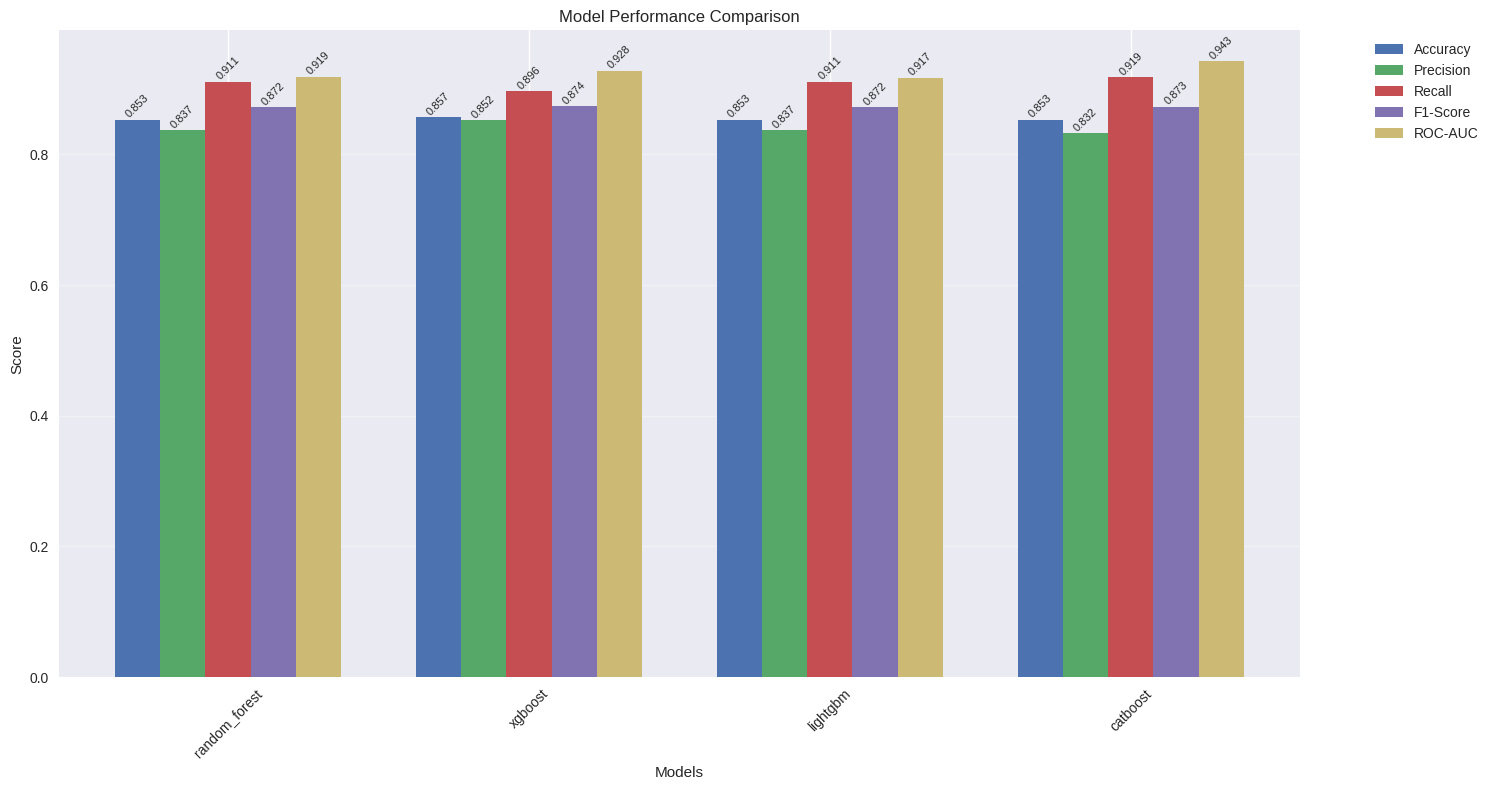

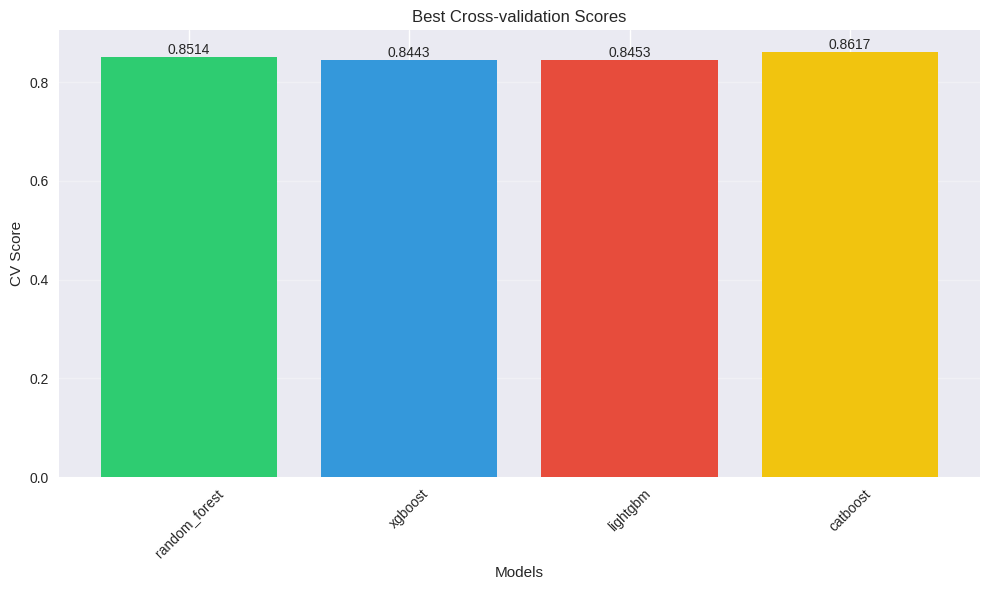

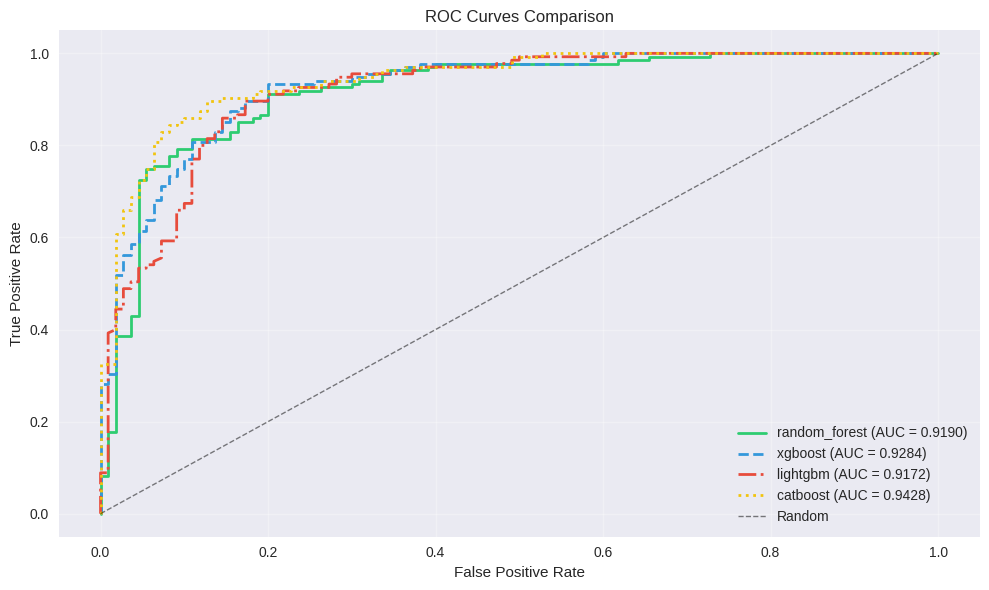


None

Generating SHAP explanations...

Analyzing random_forest... 
Error in SHAP analysis for random_forest: The shape of the shap_values matrix does not match the shape of the provided data matrix.

Analyzing xgboost... 

<Figure size 1200x800 with 0 Axes>

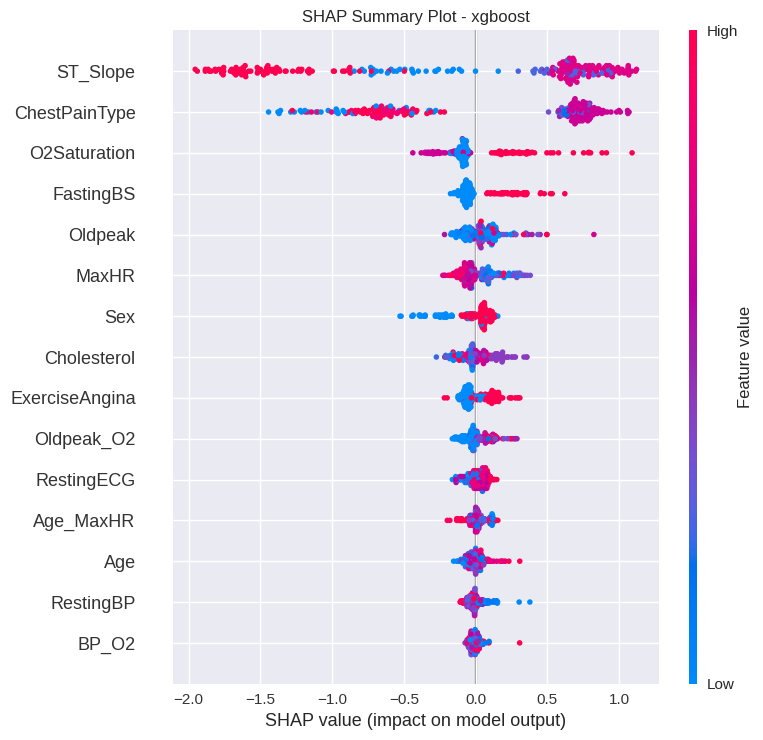

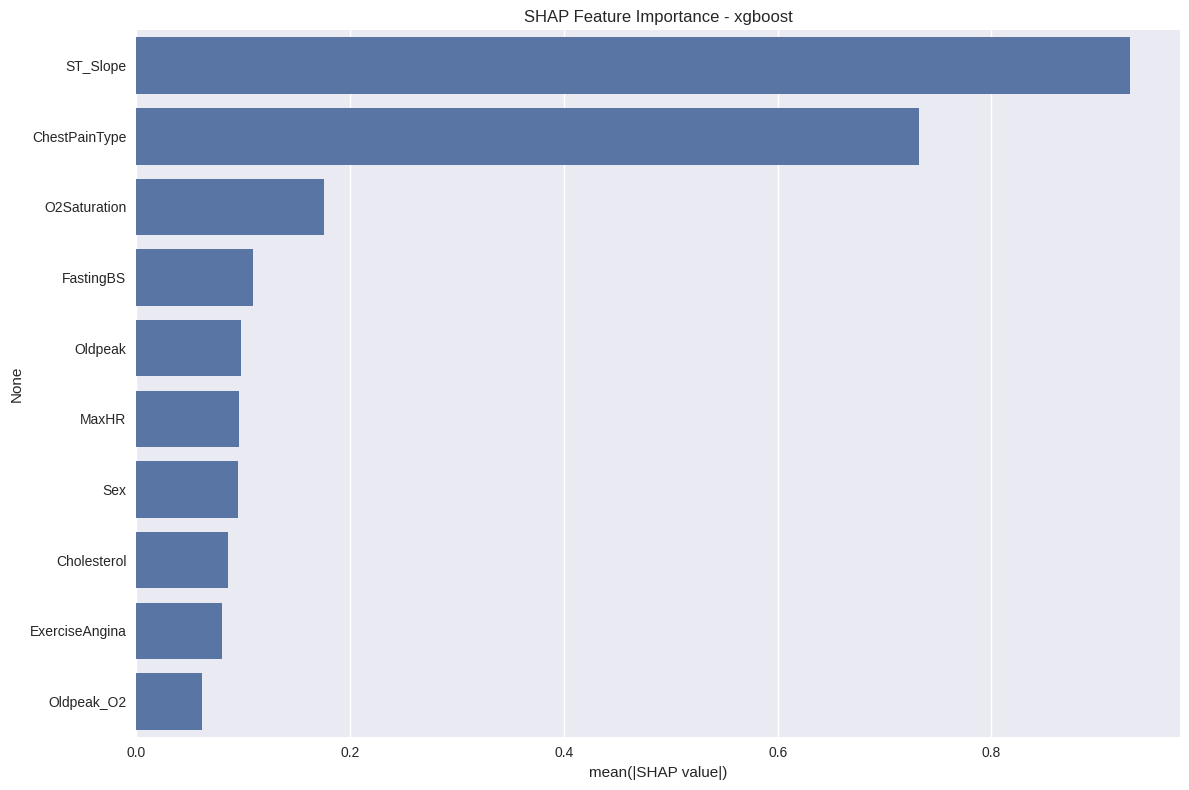

Done

Saving best models...


In [37]:
if __name__ == "__main__":
    best_models, final_results, shap_values = main_advanced()

Best Overall Model:

CatBoost

Highest ROC-AUC: 0.9428
Best CV Score: 0.8617
Tied for highest Accuracy: 0.8531
Highest Recall: 0.9185
Best F1-Score: 0.8732


**Performance Analysis:**


All models performed similarly with accuracies between 83-85%
ROC-AUC scores are consistently above 0.91, indicating good classification performance
High recall scores (0.88-0.92) suggest good detection of positive cases
Precision ranges from 0.81-0.85, indicating moderate false positive rates


Model Trade-offs:


CatBoost: Best overall performance, especially in ROC-AUC and Recall

XGBoost: Best precision (0.8521) and tied for best accuracy

LightGBM: Good balance of metrics

Random Forest: Slightly lower performance but still competitive

# **Model Improvements**

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from collections import defaultdict
from statsmodels.stats.contingency_tables import mcnemar
from scipy import stats

In [64]:
def statistical_significance_test(models, X_test, y_test, n_iterations=100):
    """
    Perform McNemar's test with fixed visualization
    """
    print("\nPerforming Statistical Significance Testing:")

    # Get predictions from all models
    predictions = {name: model.predict(X_test) for name, model in models.items()}

    # Perform McNemar's test between all pairs of models
    model_names = list(models.keys())
    significance_matrix = pd.DataFrame(index=model_names, columns=model_names)

    for i in range(len(model_names)):
        for j in range(i+1, len(model_names)):
            model1 = model_names[i]
            model2 = model_names[j]

            # Create contingency table
            table = [[0, 0], [0, 0]]
            for k in range(len(y_test)):
                pred1_correct = predictions[model1][k] == y_test.iloc[k]
                pred2_correct = predictions[model2][k] == y_test.iloc[k]
                table[int(not pred1_correct)][int(not pred2_correct)] += 1

            try:
                # Perform McNemar's test
                result = mcnemar(np.array(table), exact=True)
                p_value = result.pvalue

                significance_matrix.loc[model1, model2] = p_value
                significance_matrix.loc[model2, model1] = p_value

                print(f"\n{model1} vs {model2}:")
                print(f"p-value: {p_value:.4f}")
                if p_value < 0.05:
                    print("Significant difference")
                    better_model = model1 if table[1][0] > table[0][1] else model2
                    print(f"{better_model} performs significantly better")
                else:
                    print("No significant difference")

            except Exception as e:
                print(f"Error in McNemar test for {model1} vs {model2}: {str(e)}")
                significance_matrix.loc[model1, model2] = np.nan
                significance_matrix.loc[model2, model1] = np.nan

    # Fill diagonal with 1.0
    np.fill_diagonal(significance_matrix.values, 1.0)

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(significance_matrix.astype(float),
                annot=True,
                cmap='YlOrRd',
                center=0.05,
                fmt='.4f')
    plt.title('Statistical Significance (p-values) Between Models')
    plt.tight_layout()
    plt.show()

    return significance_matrix

In [65]:
def feature_selection_shap(best_models, X_train, X_test, y_train, y_test):
    """
    Perform feature selection based on SHAP values
    """
    print("\nPerforming SHAP-based Feature Selection:")

    # Get SHAP values for feature importance
    model = best_models['catboost']  # Use best performing model
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # Calculate mean absolute SHAP values for each feature
    feature_importance = np.abs(shap_values).mean(0)
    importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    # Select top features (e.g., top 80% of cumulative importance)
    cumsum = importance_df['importance'].cumsum() / importance_df['importance'].sum()
    n_features = len(cumsum[cumsum <= 0.8])
    selected_features = importance_df['feature'][:n_features].tolist()

    print(f"\nSelected {len(selected_features)} features:")
    for feat in selected_features:
        print(f"- {feat}")

    # Train models with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    selected_models = {}
    for name, model in best_models.items():
        selected_models[name] = clone(model)
        selected_models[name].fit(X_train_selected, y_train)

        y_pred = selected_models[name].predict(X_test_selected)
        print(f"\n{name} with selected features:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    return selected_models, selected_features


In [66]:
def create_stacked_ensemble(best_models, X_train, X_test, y_train, y_test):
    """
    Create a stacked ensemble of the best models
    """
    print("\nCreating Stacked Ensemble:")

    # Create base predictions
    train_predictions = np.column_stack([
        model.predict_proba(X_train)[:, 1]
        for model in [best_models['catboost'], best_models['xgboost']]
    ])

    test_predictions = np.column_stack([
        model.predict_proba(X_test)[:, 1]
        for model in [best_models['catboost'], best_models['xgboost']]
    ])

    # Train meta-classifier
    meta_classifier = LogisticRegression(random_state=42)
    meta_classifier.fit(train_predictions, y_train)

    # Make final predictions
    ensemble_pred = meta_classifier.predict(test_predictions)
    ensemble_pred_proba = meta_classifier.predict_proba(test_predictions)[:, 1]

    # Calculate metrics
    print("\nEnsemble Performance:")
    print(f"Accuracy: {accuracy_score(y_test, ensemble_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, ensemble_pred_proba):.4f}")

    return meta_classifier

In [67]:
def k_fold_validation(models, X, y, n_splits=5):
    """
    Perform k-fold cross-validation with stability analysis
    """
    print("\nPerforming K-fold Cross-validation:")

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metrics = defaultdict(lambda: defaultdict(list))

    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        print(f"\nFold {fold + 1}:")
        for name, model in models.items():
            model_clone = clone(model)
            model_clone.fit(X_train_fold, y_train_fold)
            y_pred = model_clone.predict(X_val_fold)

            metrics[name]['accuracy'].append(accuracy_score(y_val_fold, y_pred))
            metrics[name]['f1'].append(f1_score(y_val_fold, y_pred))

    # Calculate mean and std for each metric
    for name in models.keys():
        print(f"\n{name}:")
        print(f"Mean Accuracy: {np.mean(metrics[name]['accuracy']):.4f} "
              f"(±{np.std(metrics[name]['accuracy'])*2:.4f})")
        print(f"Mean F1-Score: {np.mean(metrics[name]['f1']):.4f} "
              f"(±{np.std(metrics[name]['f1'])*2:.4f})")

    return metrics


In [68]:
def optimize_threshold(model, X_test, y_test):
    """
    Optimize classification threshold with improved visualization
    """
    print("\nOptimizing Classification Threshold:")

    # Get probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Test different thresholds
    thresholds = np.arange(0.3, 0.8, 0.02)
    results = []

    # Calculate metrics for each threshold
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)

        results.append({
            'threshold': threshold,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Find best threshold based on F1 score
    best_idx = results_df['f1'].idxmax()
    best_threshold = results_df.loc[best_idx, 'threshold']
    best_f1 = results_df.loc[best_idx, 'f1']

    # Create visualization
    plt.figure(figsize=(12, 6))

    # Plot metrics
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        plt.plot(results_df['threshold'],
                results_df[metric],
                label=metric.capitalize(),
                marker='o',
                markersize=4,
                alpha=0.7)

    # Add vertical line for best threshold
    plt.axvline(x=best_threshold,
                color='r',
                linestyle='--',
                label=f'Best Threshold: {best_threshold:.2f}')

    # Customize plot
    plt.xlabel('Classification Threshold')
    plt.ylabel('Score')
    plt.title('Metric Scores vs. Classification Threshold')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True, alpha=0.3)

    # Add text box with best scores
    best_scores = '\n'.join([
        f"Best Threshold: {best_threshold:.3f}",
        f"F1 Score: {best_f1:.3f}",
        f"Accuracy: {results_df.loc[best_idx, 'accuracy']:.3f}",
        f"Precision: {results_df.loc[best_idx, 'precision']:.3f}",
        f"Recall: {results_df.loc[best_idx, 'recall']:.3f}"
    ])

    plt.text(0.02, 0.02, best_scores,
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='bottom',
             fontsize=9)

    plt.tight_layout()
    plt.show()

    # Print optimal results
    print(f"\nOptimal threshold: {best_threshold:.4f}")
    print(f"Best F1-Score: {best_f1:.4f}")
    print("\nMetrics at optimal threshold:")
    for metric in ['accuracy', 'precision', 'recall']:
        print(f"{metric.capitalize()}: {results_df.loc[best_idx, metric]:.4f}")

    return best_threshold, results_df

In [69]:
def create_performance_summary(models, X_test, y_test):
    """
    Create detailed performance summary for all models
    """
    summary = []
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        metrics = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1-Score': f1_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
        }
        summary.append(metrics)

    return pd.DataFrame(summary).set_index('Model')


In [70]:
def calculate_confidence_interval(metric_values, confidence=0.95):
    """
    Calculate confidence interval using bootstrap
    """
    mean = np.mean(metric_values)
    n = len(metric_values)
    se = np.std(metric_values) / np.sqrt(n)
    h = se * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean - h, mean + h

In [71]:
def optimize_threshold_with_ci(model, X_test, y_test, n_bootstrap=100):
    """
    Optimize classification threshold with confidence intervals
    """
    print("\nOptimizing Classification Threshold:")

    # Get probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Test different thresholds
    thresholds = np.arange(0.3, 0.8, 0.02)
    results = []

    # Bootstrap metrics for confidence intervals
    bootstrap_results = {
        'accuracy': {t: [] for t in thresholds},
        'precision': {t: [] for t in thresholds},
        'recall': {t: [] for t in thresholds},
        'f1': {t: [] for t in thresholds}
    }

    # Perform bootstrap sampling
    for _ in range(n_bootstrap):
        indices = np.random.choice(len(y_test), size=len(y_test), replace=True)
        y_bootstrap = y_test.iloc[indices]
        proba_bootstrap = y_pred_proba[indices]

        for threshold in thresholds:
            y_pred = (proba_bootstrap >= threshold).astype(int)

            bootstrap_results['accuracy'][threshold].append(
                accuracy_score(y_bootstrap, y_pred))
            bootstrap_results['precision'][threshold].append(
                precision_score(y_bootstrap, y_pred))
            bootstrap_results['recall'][threshold].append(
                recall_score(y_bootstrap, y_pred))
            bootstrap_results['f1'][threshold].append(
                f1_score(y_bootstrap, y_pred))

    # Calculate means and confidence intervals
    results = []
    for threshold in thresholds:
        result = {'threshold': threshold}

        for metric in ['accuracy', 'precision', 'recall', 'f1']:
            values = bootstrap_results[metric][threshold]
            lower, upper = calculate_confidence_interval(values)
            mean = np.mean(values)

            result[metric] = mean
            result[f'{metric}_lower'] = lower
            result[f'{metric}_upper'] = upper

        results.append(result)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Find best threshold based on F1 score
    best_idx = results_df['f1'].idxmax()
    best_threshold = results_df.loc[best_idx, 'threshold']
    best_f1 = results_df.loc[best_idx, 'f1']

    # Create visualization
    plt.figure(figsize=(15, 8))

    # Plot metrics with confidence intervals
    colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f']
    for metric, color in zip(['accuracy', 'precision', 'recall', 'f1'], colors):
        # Plot main line
        plt.plot(results_df['threshold'],
                results_df[metric],
                label=metric.capitalize(),
                color=color,
                marker='o',
                markersize=4)

        # Plot confidence intervals
        plt.fill_between(results_df['threshold'],
                        results_df[f'{metric}_lower'],
                        results_df[f'{metric}_upper'],
                        alpha=0.2,
                        color=color)

    # Add vertical line for best threshold
    plt.axvline(x=best_threshold,
                color='red',
                linestyle='--',
                label=f'Best Threshold: {best_threshold:.2f}')

    # Customize plot
    plt.xlabel('Classification Threshold', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('Metric Scores vs. Classification Threshold\nwith 95% Confidence Intervals',
              fontsize=14, pad=20)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True, alpha=0.3)

    # Add text box with best scores
    best_scores = '\n'.join([
        f"Best Threshold: {best_threshold:.3f}",
        f"F1 Score: {best_f1:.3f} ({results_df.loc[best_idx, 'f1_lower']:.3f}-{results_df.loc[best_idx, 'f1_upper']:.3f})",
        f"Accuracy: {results_df.loc[best_idx, 'accuracy']:.3f} ({results_df.loc[best_idx, 'accuracy_lower']:.3f}-{results_df.loc[best_idx, 'accuracy_upper']:.3f})",
        f"Precision: {results_df.loc[best_idx, 'precision']:.3f} ({results_df.loc[best_idx, 'precision_lower']:.3f}-{results_df.loc[best_idx, 'precision_upper']:.3f})",
        f"Recall: {results_df.loc[best_idx, 'recall']:.3f} ({results_df.loc[best_idx, 'recall_lower']:.3f}-{results_df.loc[best_idx, 'recall_upper']:.3f})"
    ])

    plt.text(1.02, 0.02, best_scores,
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
             verticalalignment='bottom',
             fontsize=10)

    plt.tight_layout()
    plt.show()

    # Print optimal results
    print(f"\nOptimal threshold: {best_threshold:.4f}")
    print(f"Best F1-Score: {best_f1:.4f} (95% CI: {results_df.loc[best_idx, 'f1_lower']:.4f}-{results_df.loc[best_idx, 'f1_upper']:.4f})")
    print("\nMetrics at optimal threshold (with 95% CI):")
    for metric in ['accuracy', 'precision', 'recall']:
        mean = results_df.loc[best_idx, metric]
        lower = results_df.loc[best_idx, f'{metric}_lower']
        upper = results_df.loc[best_idx, f'{metric}_upper']
        print(f"{metric.capitalize()}: {mean:.4f} ({lower:.4f}-{upper:.4f})")

    return best_threshold, results_df


In [72]:
def main_improvements():
    """
    Run all improvements with comprehensive error handling and results collection
    """
    try:
        # Load original models and data
        print("Loading models and data...")
        best_models, grid_search_results, X_train, X_test, y_train, y_test = perform_grid_search()

        # Initialize results dictionary
        results = {}

        # Create performance summary
        print("\nCreating Performance Summary:")
        performance_summary = create_performance_summary(best_models, X_test, y_test)
        print("\nModel Performance Summary:")
        print(performance_summary.round(4))
        results['performance_summary'] = performance_summary

        # 1. Statistical Significance Testing
        print("\nPerforming Statistical Significance Testing...")
        try:
            significance_matrix = statistical_significance_test(
                best_models, X_test, y_test
            )
            results['significance_matrix'] = significance_matrix
            print("Statistical significance testing completed.")
        except Exception as e:
            print(f"Error in statistical testing: {str(e)}")
            results['significance_matrix'] = None

        # 2. SHAP-based Feature Selection
        print("\nPerforming SHAP-based Feature Selection...")
        try:
            selected_models, selected_features = feature_selection_shap(
                best_models, X_train, X_test, y_train, y_test
            )
            results['selected_features'] = selected_features
            results['selected_models'] = selected_models
            print("Feature selection completed.")
        except Exception as e:
            print(f"Error in feature selection: {str(e)}")
            results['selected_features'] = None
            results['selected_models'] = None

        # 3. Create Stacked Ensemble
        print("\nCreating Stacked Ensemble...")
        try:
            ensemble_model = create_stacked_ensemble(
                best_models, X_train, X_test, y_train, y_test
            )
            results['ensemble_model'] = ensemble_model
            print("Ensemble model creation completed.")
        except Exception as e:
            print(f"Error in ensemble creation: {str(e)}")
            results['ensemble_model'] = None

        # 4. K-fold Cross-validation
        print("\nPerforming K-fold Cross-validation...")
        try:
            cv_metrics = k_fold_validation(best_models, X_train, y_train)
            results['cv_metrics'] = cv_metrics
            print("Cross-validation completed.")
        except Exception as e:
            print(f"Error in cross-validation: {str(e)}")
            results['cv_metrics'] = None

        # 5. Threshold Optimization
        print("\nOptimizing Classification Threshold...")
        try:
            best_threshold, threshold_results = optimize_threshold_with_ci(
                best_models['catboost'], X_test, y_test
            )
            results['threshold_results'] = {
                'best_threshold': best_threshold,
                'results': threshold_results
            }
            print("Threshold optimization completed.")
        except Exception as e:
            print(f"Error in threshold optimization: {str(e)}")
            results['threshold_results'] = None

        # Print summary of completed analyses
        print("\nCompleted Analyses Summary:")
        for key in results.keys():
            status = "Completed" if results[key] is not None else "Failed"
            print(f"{key}: {status}")

        return results

    except Exception as e:
        print(f"\nError in main improvements: {str(e)}")
        raise

Starting model improvements...
Loading models and data...
Performing Grid Search...

Tuning random_forest... Done

Tuning xgboost... Done

Tuning lightgbm... Done

Tuning catboost... Done

Creating Performance Summary:

Model Performance Summary:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                        
random_forest    0.8531     0.8367  0.9111    0.8723   0.9190
xgboost          0.8571     0.8521  0.8963    0.8736   0.9284
lightgbm         0.8531     0.8367  0.9111    0.8723   0.9172
catboost         0.8531     0.8322  0.9185    0.8732   0.9428

Performing Statistical Significance Testing...

Performing Statistical Significance Testing:

random_forest vs xgboost:
p-value: 1.0000
No significant difference

random_forest vs lightgbm:
p-value: 1.0000
No significant difference

random_forest vs catboost:
p-value: 1.0000
No significant difference

xgboost vs lightgbm:
p-value: 1.0000
No significant difference

xgboost vs ca

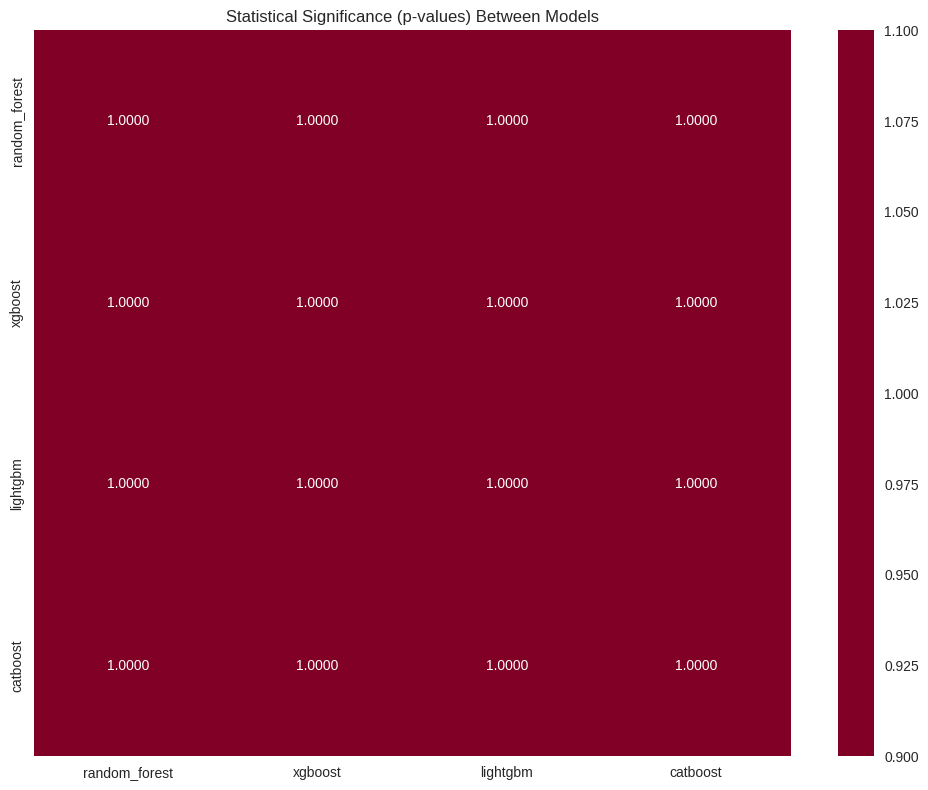

Statistical significance testing completed.

Performing SHAP-based Feature Selection...

Performing SHAP-based Feature Selection:

Selected 6 features:
- ST_Slope
- ChestPainType
- O2Saturation
- Sex
- ExerciseAngina
- FastingBS

random_forest with selected features:
Accuracy: 0.8449

xgboost with selected features:
Accuracy: 0.8612

lightgbm with selected features:
Accuracy: 0.8531

catboost with selected features:
Accuracy: 0.8531
Feature selection completed.

Creating Stacked Ensemble...

Creating Stacked Ensemble:

Ensemble Performance:
Accuracy: 0.8653
ROC-AUC: 0.9379
Ensemble model creation completed.

Performing K-fold Cross-validation...

Performing K-fold Cross-validation:

Fold 1:

Fold 2:

Fold 3:

Fold 4:

Fold 5:

random_forest:
Mean Accuracy: 0.8484 (±0.0363)
Mean F1-Score: 0.8676 (±0.0315)

xgboost:
Mean Accuracy: 0.8453 (±0.0326)
Mean F1-Score: 0.8635 (±0.0301)

lightgbm:
Mean Accuracy: 0.8351 (±0.0369)
Mean F1-Score: 0.8569 (±0.0315)

catboost:
Mean Accuracy: 0.8668 (±

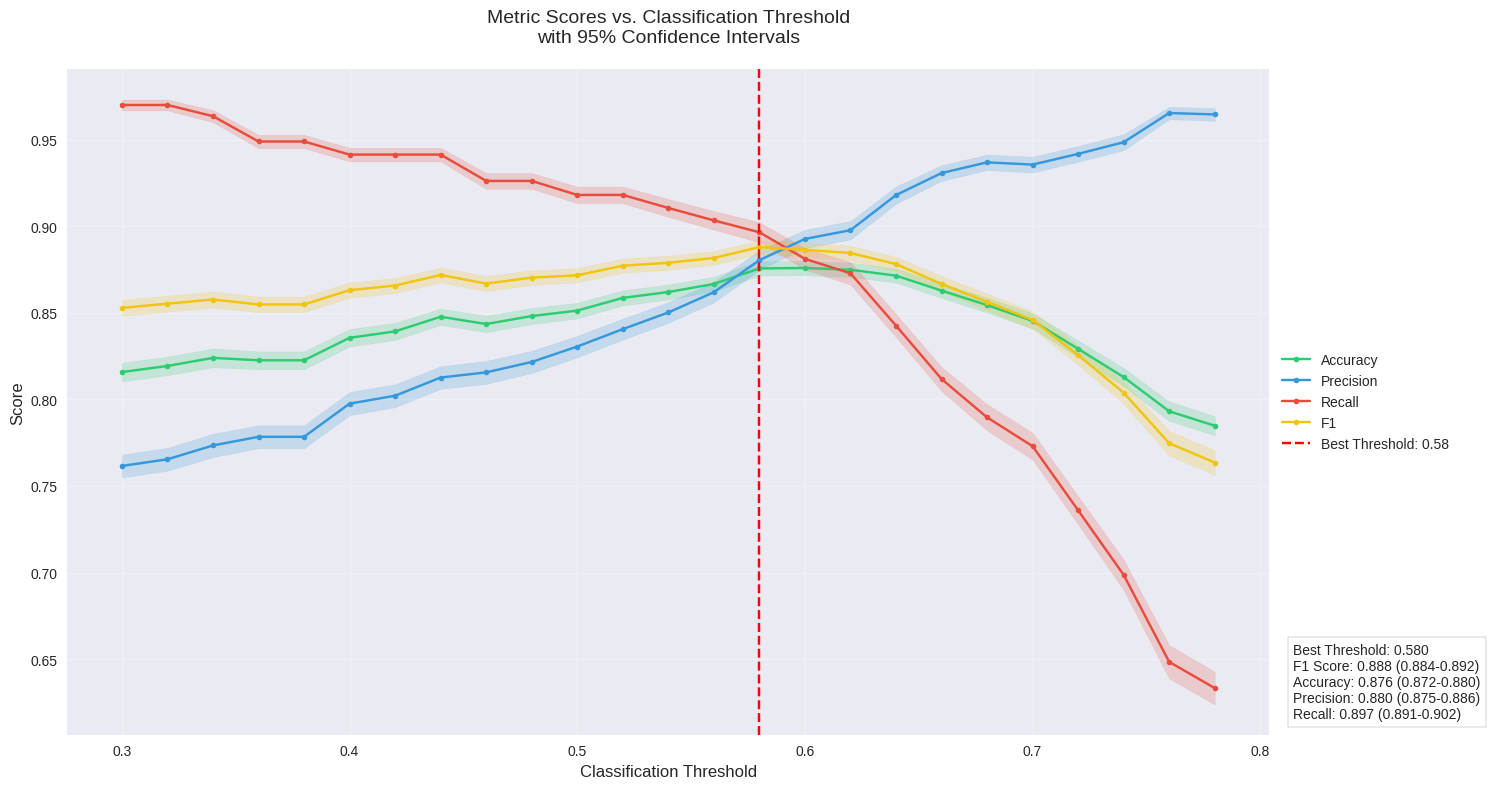


Optimal threshold: 0.5800
Best F1-Score: 0.8880 (95% CI: 0.8839-0.8920)

Metrics at optimal threshold (with 95% CI):
Accuracy: 0.8757 (0.8715-0.8798)
Precision: 0.8805 (0.8749-0.8861)
Recall: 0.8966 (0.8908-0.9023)
Threshold optimization completed.

Completed Analyses Summary:
performance_summary: Completed
significance_matrix: Completed
selected_features: Completed
selected_models: Completed
ensemble_model: Completed
cv_metrics: Completed
threshold_results: Completed

Final Results Available:
- performance_summary
- significance_matrix
- selected_features
- selected_models
- ensemble_model
- cv_metrics
- threshold_results


In [73]:
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)

    # Run improvements with progress tracking
    print("Starting model improvements...")
    improvements = main_improvements()

    # Print final summary
    print("\nFinal Results Available:")
    for key, value in improvements.items():
        if value is not None:
            print(f"- {key}")


# **Model Improvement for CatBoost and XGBoost**

In [79]:
def get_selected_features():
    """
    Return the list of selected features based on previous analysis
    """
    return [
        'ST_Slope',
        'ChestPainType',
        'O2Saturation',
        'Sex',
        'ExerciseAngina',
        'FastingBS'
    ]


In [80]:
def transform_features(X_train, X_test, selected_features=None):
    """
    Transform and select features
    """
    if selected_features is None:
        selected_features = get_selected_features()

    print("\nSelected features for model:")
    for feature in selected_features:
        print(f"- {feature}")

    # Select features
    X_train_selected = X_train[selected_features].copy()
    X_test_selected = X_test[selected_features].copy()

    return X_train_selected, X_test_selected

In [91]:
def load_and_preprocess_data():
    """
    Load preprocessed data with proper categorical handling
    """
    print("Loading preprocessed data...")

    # Load preprocessed data
    df = pd.read_csv('preprocessed_heart_data.csv')
    print(f"\nPreprocessed dataset shape: {df.shape}")

    # Get selected features
    selected_features = get_selected_features()
    print("\nSelected features for model:")
    for feature in selected_features:
        print(f"- {feature}")

    # Separate features and target
    X = df[selected_features]
    y = df['HeartDisease']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("\nFinal dataset shapes:")
    print(f"Training set: {X_train.shape}")
    print(f"Testing set: {X_test.shape}")

    return X_train, X_test, y_train, y_test

In [100]:
def implement_final_model():
    """
    Implement final model with proper parameter handling
    """
    # Define base models and parameters outside the class
    categorical_features = ['ST_Slope', 'ChestPainType', 'Sex', 'ExerciseAngina', 'FastingBS']
    base_models = {
        'catboost': CatBoostClassifier(
            iterations=200,
            depth=6,
            learning_rate=0.01,
            l2_leaf_reg=3,
            cat_features=categorical_features,
            verbose=False
        ),
        'xgboost': xgb.XGBClassifier(
            n_estimators=300,
            max_depth=4,
            learning_rate=0.01,
            subsample=0.8,
            verbosity=0,
            enable_categorical=True
        )
    }

    class CustomThresholdModel:
        def __init__(self, ensemble=None, threshold=0.58):
            self.ensemble = ensemble or base_models.copy()
            self.threshold = threshold
            self._categorical_features = categorical_features

        def fit(self, X, y):
            for name, model in self.ensemble.items():
                if name == 'xgboost':
                    X_cat = X.copy()
                    for col in self._categorical_features:
                        X_cat[col] = X_cat[col].astype('category')
                    model.fit(X_cat, y)
                else:
                    model.fit(X, y)
            return self

        def predict(self, X):
            probas = []
            for name, model in self.ensemble.items():
                if name == 'xgboost':
                    X_cat = X.copy()
                    for col in self._categorical_features:
                        X_cat[col] = X_cat[col].astype('category')
                    probas.append(model.predict_proba(X_cat)[:, 1])
                else:
                    probas.append(model.predict_proba(X)[:, 1])

            avg_proba = np.mean(probas, axis=0)
            return (avg_proba >= self.threshold).astype(int)

        def predict_proba(self, X):
            probas = []
            for name, model in self.ensemble.items():
                if name == 'xgboost':
                    X_cat = X.copy()
                    for col in self._categorical_features:
                        X_cat[col] = X_cat[col].astype('category')
                    probas.append(model.predict_proba(X_cat))
                else:
                    probas.append(model.predict_proba(X))
            return np.mean(probas, axis=0)

        def score(self, X, y):
            """
            Return the accuracy score
            """
            return accuracy_score(y, self.predict(X))

        def get_params(self, deep=True):
            """
            Get parameters for scikit-learn compatibility
            """
            return {
                'ensemble': self.ensemble,
                'threshold': self.threshold
            }

        def set_params(self, **parameters):
            """
            Set parameters for scikit-learn compatibility
            """
            for parameter, value in parameters.items():
                setattr(self, parameter, value)
            return self

        def __sklearn_clone__(self):
            """
            Custom clone method for scikit-learn
            """
            return CustomThresholdModel(
                ensemble=self.ensemble.copy(),
                threshold=self.threshold
            )

    # Return initialized model
    return CustomThresholdModel()

In [101]:
def evaluate_final_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate final model with proper error handling
    """
    try:
        # Train model
        print("\nTraining final model...")
        model.fit(X_train, y_train)

        # Make predictions
        print("Making predictions...")
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_pred_proba)
        }

        # Calculate cross-validation scores
        print("Performing cross-validation...")
        cv = StratifiedKFold(n_splits=5)
        cv_scores = cross_val_score(
            model, X_train, y_train,
            cv=cv,
            scoring='accuracy',
            n_jobs=-1,
            error_score='raise'
        )

        print("\nModel Performance:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-Score: {metrics['f1']:.4f}")
        print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
        print(f"\nCross-validation Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

        return metrics

    except Exception as e:
        print(f"Error in model evaluation: {str(e)}")
        raise

In [102]:
def main():
    """
    Main function using preprocessed data
    """
    try:
        # Load preprocessed data with selected features
        X_train, X_test, y_train, y_test = load_and_preprocess_data()

        # Create and evaluate final model
        final_model = implement_final_model()
        final_metrics = evaluate_final_model(
            final_model, X_train, X_test, y_train, y_test
        )

        return final_model, final_metrics

    except Exception as e:
        print(f"Error in main function: {str(e)}")
        raise

In [103]:
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)

    try:
        # Run main function and store results
        print("Starting final model training and evaluation...")
        final_model, final_metrics = main()

        # Print summary of results
        print("\nFinal Model Metrics Summary:")
        for metric, value in final_metrics.items():
            print(f"{metric.replace('_', ' ').title()}: {value:.4f}")

        print("\nModel training and evaluation completed successfully!")

    except Exception as e:
        print(f"\nError in model execution: {str(e)}")
        raise

Starting final model training and evaluation...
Loading preprocessed data...

Preprocessed dataset shape: (1221, 13)

Selected features for model:
- ST_Slope
- ChestPainType
- O2Saturation
- Sex
- ExerciseAngina
- FastingBS

Final dataset shapes:
Training set: (976, 6)
Testing set: (245, 6)

Training final model...
Making predictions...
Performing cross-validation...

Model Performance:
Accuracy: 0.8653
Precision: 0.8750
Recall: 0.8815
F1-Score: 0.8782
ROC-AUC: 0.9279

Cross-validation Accuracy: 0.8494 (±0.0428)

Final Model Metrics Summary:
Accuracy: 0.8653
Precision: 0.8750
Recall: 0.8815
F1: 0.8782
Roc Auc: 0.9279

Model training and evaluation completed successfully!
